In [113]:
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import rasterio as rio
import earthpy as et
import earthpy.plot as ep
import json

et.data.get_data(url="https://figshare.com/ndownloader/files/31746578");


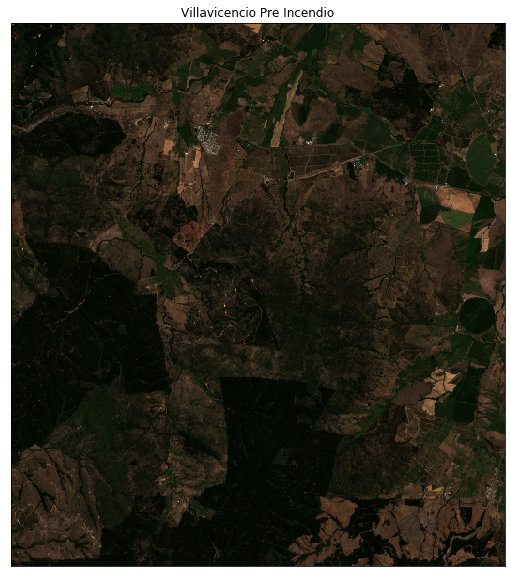

In [114]:
with rio.open('R096_T18HYF_20170119T144547_resampled_20m_reprojected.tif') as naip_prefire_src:
    naip_pre_fire = naip_prefire_src.read()

fig, ax = plt.subplots(figsize=(10, 10))
ep.plot_rgb(
    naip_pre_fire,
    rgb=(2,1,0),
    ax=ax,
    title="Villavicencio Pre Incendio",
)
plt.show()

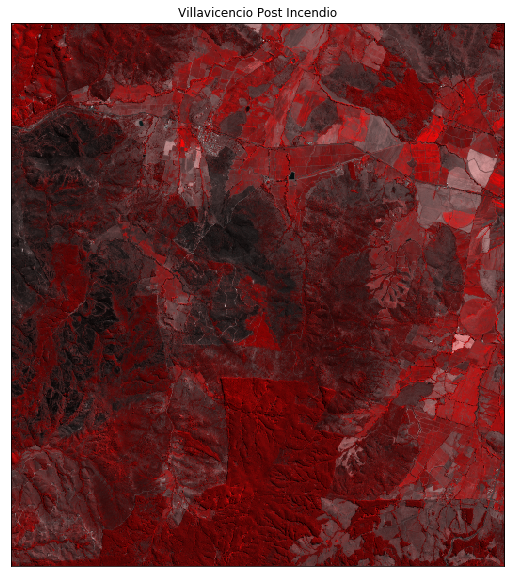

In [115]:

with rio.open('R096_T18HYF_20170320T145159_resampled_20m_reprojected.tif') as naip_postfire_src:
    naip_postfire_src = naip_postfire_src.read()


fig, ax = plt.subplots(figsize=(10, 10))

ep.plot_rgb(
    naip_postfire_src,
    rgb=(6,2,2),
    ax=ax,
    title="Villavicencio Post Incendio",
)
plt.show()

In [116]:
et.data.get_data(url="http://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip");
et.data.get_data(url="https://ndownloader.figshare.com/files/26266609");
et.data.get_data(url="https://ndownloader.figshare.com/files/26295142");

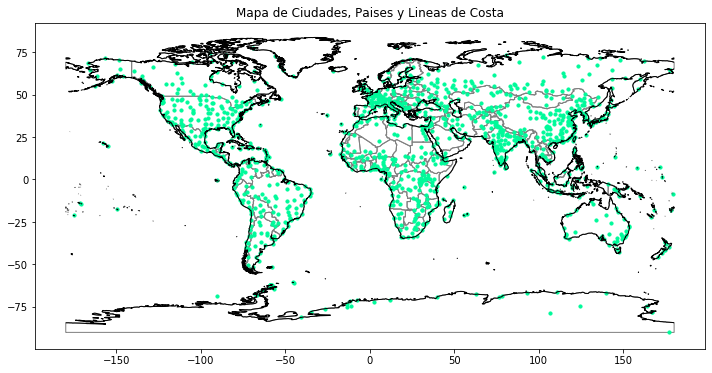

In [117]:
boundary = gpd.read_file('ne_50m_coastline/ne_50m_coastline.shp')
countries = gpd.read_file('/home/myge/Documents/GitHub/tareas/xxx/ne_50m_admin_0_countries/ne_50m_admin_0_countries.shp')
cities = gpd.read_file('ne_50m_populated_places_simple/ne_50m_populated_places_simple.shp')

f, ax1 = plt.subplots(figsize=(12, 6));

boundary.plot(ax=ax1, color='black',linewidth=1);
countries.plot(ax=ax1,             
            edgecolor='gray',
            facecolor='none'
            );
cities.plot(ax=ax1,
            markersize=10,
            color='mediumspringgreen'
            )
plt.title('Mapa de Ciudades, Paises y Lineas de Costa')
plt.show()

In [118]:
et.data.get_data(url="https://github.com/balonchino/imagenes/raw/main/asignacion3_prueba3_IBOS249.zip")

'/home/myge/earth-analytics/data/earthpy-downloads/asignacion3_prueba3_IBOS249'

In [119]:
ne_roads = gpd.read_file('asignacion3_prueba3_IBOS249/ne_10m_roads.shp')
places = gpd.read_file('asignacion3_prueba3_IBOS249/ne_110m_populated_places_simple.shp')
country_boundary_us = gpd.read_file('asignacion3_prueba3_IBOS249/usa-boundary-dissolved.shp')

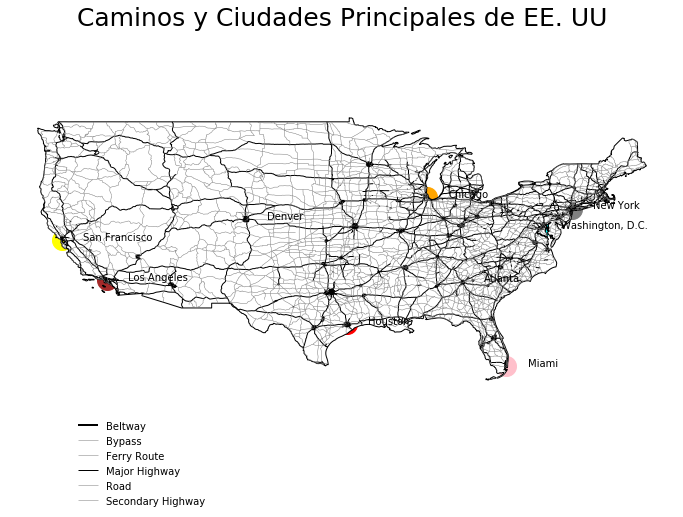

In [120]:
ne_roads_clip = gpd.clip(ne_roads, country_boundary_us)
places_clip = gpd.clip(places,country_boundary_us)

# Primero, crear un diccionario con los atributos para cada categoría
road_attrs = {'Beltway': ['black', 2],
              'Secondary Highway': ['grey', .5],
              'Road': ['grey', .5],
              'Bypass': ['grey', .5],
              'Ferry Route': ['grey', .5],
              'Major Highway': ['black', 1]}


cities_attrs = {
                'San Francisco' : ['yellow'],
                'Los Angeles' : ['brown'],
                'Denver' : ['green'],
                'Houston' : ['Red'],
                'Atlanta' : ['blue'],
                'Miami' : ['pink'],
                'Chicago' : ['orange'],
                'Washington, D.C.' : ['aqua'],
                'New York' : ['gray']
}

print(places_clip.groupby('name'))

# Plotear los datos
fig, ax = plt.subplots(figsize=(12, 8))

# Loop que recorre diccionario y se plotea los datos usando el diccionario 
for ctype, data in ne_roads_clip.groupby('type'):
    data.plot(color=road_attrs[ctype][0],
              label=ctype,
              ax=ax,
              linewidth=road_attrs[ctype][1])


for ctype, data in places_clip.groupby('name'):
    data.plot(color=cities_attrs[ctype][0],
                markersize=400,
                legend='asd',
                ax=ax)
    a = json.loads(data['geometry'].to_json())
    coordx = a['features'][0]['geometry']['coordinates'][0]
    coordy = a['features'][0]['geometry']['coordinates'][1]

    plt.text(coordx+2,coordy, ctype)

country_boundary_us.plot(alpha=1, color="white", edgecolor="black", ax=ax)


# Dibuja leyenda sin marco y posición
ax.legend(frameon=False, loc = (0.1, -0.1))

ax.set_title("Caminos y Ciudades Principales de EE. UU", fontsize=25)
ax.set_axis_off()

plt.axis('equal');
plt.show()